### **Método de Runge-Kutta de orden cuatro**

El método de Runge-Kutta de orden cuatro es un método numérico para resolver ecuaciones diferenciales ordinarias. Se basa en aproximar la solución a 

\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}t} = f(t, y)
\end{equation}

Para esto, se sigue el procedimiento:

- Calcular $k_1 = f(t_0, y_0)$
- Calcular $k_2 = f(t_0+\frac{h}{2}, y_0+\frac{h}{2}k_1)$
- Calcular $k_3 = f(t_0+\frac{h}{2}, y_0+\frac{h}{2}k_2)$
- Calcular $k_4 = f(t_0+h, y_0+hk_3)$

Luego se calcula el promedio, 

\begin{equation}
prom = \frac{h}{6}(k_1+k_2+k_3+k_4)
\end{equation}

Por último, 

\begin{equation}
y_{n+1}=y_0+prom
\end{equation}

$h$  es el tamaño del paso y El orden de convergencia del método es cuatro, lo que significa que el error local es proporcional a $h^5$ y el error global es proporcional a $h^4$

In [1]:
# Librerías

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
# Se define la función
def fun(t, y, params):
  a = params[0]
  dydt = -a*y
  return dydt

''' Condiciones iniciales '''

y_0 = 100 # condicion inicial
t_0 = 0 # tiempo inicial
tf = 1 # tiempo final
a = 1 # parametros de la ecuacion diferencial
params = (a,)
Nt = 100 # numero de tiempos
t = np.linspace(t_0, tf, Nt)
h = 1/Nt # espaciamientos

k1 = fun(t_0, y_0, params)
k2 = fun(t_0 + h/2, y_0 + h/2*k1, params)
k3 = fun(t_0 + h/2, y_0 + h/2*k2, params)
k4 = fun(t_0 + h, y_0 + h*k3, params)

prom = (h/6) * (k1 + k2 + k3 + k4)

y_1 = y_0 + prom

In [3]:
y_1

99.33665420833333

In [4]:
t_1 = t_0+h

k1 = fun(t_1, y_0, params)
k2 = fun(t_1 + h/2, y_0 + h/2*k1, params)
k3 = fun(t_1 + h/2, y_0 + h/2*k2, params)
k4 = fun(t_1 + h, y_0 + h*k3, params)

prom = (h/6) * (k1 + k2 + k3 + k4) 

y_2 = y_1 + prom
y_2

98.67330841666666

In [5]:
# Generalización del método 

y = np.zeros(100)
y[0] = 100
a = 1 
params = (a,)
t_0 = 0 
tf = 1 
Nt = 100 
t = np.linspace(t_0, tf, Nt)
h = 1 / Nt 

for i in range(0, Nt-1):
  k1 = fun(t[i], y[i], params)
  k2 = fun(t[i] + h/2, y[i] + h/2*k1, params)
  k3 = fun(t[i] + h/2, y[i] + h/2*k2, params)
  k4 = fun(t[i] + h, y[i] + h*k3, params)

  prom = (h/6) * (k1 + k2 + k3 + k4)
  
  y[i+1] = y[i] + prom

y

array([100.        ,  99.33665421,  98.67770869,  98.02313427,
        97.37290193,  96.72698288,  96.08534851,  95.4479704 ,
        94.8148203 ,  94.18587018,  93.56109217,  92.94045861,
        92.32394199,  91.711515  ,  91.10315053,  90.49882161,
        89.89850149,  89.30216356,  88.70978142,  88.12132882,
        87.53677969,  86.95610814,  86.37928846,  85.80629509,
        85.23710264,  84.6716859 ,  84.11001984,  83.55207956,
        82.99784036,  82.44727768,  81.90036713,  81.35708449,
        80.8174057 ,  80.28130684,  79.74876417,  79.2197541 ,
        78.69425319,  78.17223817,  77.65368592,  77.13857346,
        76.62687798,  76.11857681,  75.61364744,  75.11206749,
        74.61381475,  74.11886715,  73.62720276,  73.13879981,
        72.65363666,  72.17169182,  71.69294394,  71.21737181,
        70.74495437,  70.2756707 ,  69.80949999,  69.34642161,
        68.88641504,  68.42945991,  67.97553597,  67.52462311,
        67.07670136,  66.63175089,  66.18975197,  65.75

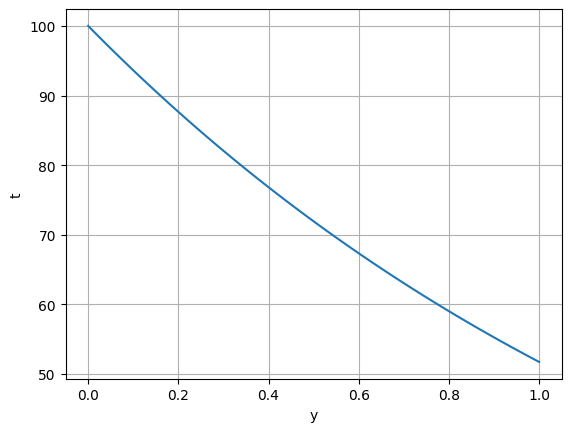

In [6]:
plt.plot(t,y)
plt.xlabel("y")
plt.ylabel("t")
plt.grid()

### **Atractor de Lorenz**

$\frac{dx}{dt} = a(y-x)$

$\frac {dy}{dt} = x(b-z)-y$

$\frac {dz}{dt} = xy-cz$

In [7]:
# Se definen las funciones

a = 10
b = 28
c = 8/3
params1 = (a, b, c)

x = 1
y = 1
z = 1
params2 = (x, y, z)

def fun1(t, x0, params1, params2):
  y = params2[1]
  a = params1[0]
  dxdt = a*(y-x0)
  return dxdt

def fun2(t, y0, params1, params2):
  z = params2[2]
  x = params2[0]
  b = params1[1]
  dydt = x*(b-z) - y0
  return dydt

def fun3(t, z0, params1, params2):
  x = params2[0]
  y = params2[1]
  c = params1[2]
  dzdt = x*y - c*z0
  return dzdt

In [8]:
y1 = np.zeros(100)
y1[0] = 100
t_0 = 0 
tf = 1 
Nt = 100 
t = np.linspace(t_0, tf, Nt)
h = 1 / Nt 

for i in range(0, Nt-1):
  k1 = fun1(t[i], y1[i], params1, params2)
  k2 = fun1(t[i] + h/2, y1[i] + h/2*k1, params1, params2)
  k3 = fun1(t[i] + h/2, y1[i] + h/2*k2, params1, params2)
  k4 = fun1(t[i] + h, y1[i] + h*k3, params1, params2)

  prom = (h/6) * (k1 + k2 + k3 + k4)
  y1[i+1] = y1[i] + prom

In [9]:
y2 = np.zeros(100)
y2[0] = 100

for i in range(0, Nt-1):
  k1 = fun2(t[i], y2[i], params1, params2)
  k2 = fun2(t[i] + h/2, y2[i] + h/2*k1, params1, params2)
  k3 = fun2(t[i] + h/2, y2[i] + h/2*k2, params1, params2)
  k4 = fun2(t[i] + h, y2[i] + h*k3, params1, params2)

  prom = (h/6) * (k1 + k2 + k3 + k4)
  y2[i+1] = y2[i] + prom

In [10]:
y3 = np.zeros(100)
y3[0] = 100

for i in range(0, Nt-1):
  k1 = fun3(t[i], y3[i], params1, params2)
  k2 = fun3(t[i] + h/2, y3[i] + h/2*k1, params1, params2)
  k3 = fun3(t[i] + h/2, y3[i] + h/2*k2, params1, params2)
  k4 = fun3(t[i] + h, y3[i] + h*k3, params1, params2)

  prom = (h/6) * (k1 + k2 + k3 + k4)
  y3[i+1] = y3[i] + prom

In [11]:
#@title Forma generalizada para el atractor de Lorenz

In [32]:
''' Condiciones iniciales '''

a = 10
b = 28
c = 8/3
params = (a, b, c)

t = np.arange(0, 40, h)
ti = t[0]
h = 0.001

N = len(t)
y = np.zeros(N)
x = np.zeros(N)
z = np.zeros(N)

posI = [1, 1, 1]
x[0], y[0], z[0] = np.array(posI)  

In [28]:
# Se define la función

def fun(t, x,y,z, params):
  a = params[0]  
  b = params[1]  
  c = params[2]   

  dxdt = a*(y-x)
  dydt = x*(b-z)-y
  dzdt = x*y-c*z
  return np.array([dxdt, dydt, dzdt])

In [30]:
for i in range(0, N-1):
  k1 = fun(ti,       x[i],            y[i], z[i], params)[0]
  k2 = fun(ti + h/2, x[i] + h/2 * k1, y[i], z[i], params)[0]
  k3 = fun(ti + h/2, x[i] + h/2 * k2, y[i], z[i], params)[0]
  k4 = fun(ti + h  , x[i] + h   * k3, y[i], z[i], params)[0]
  kmean = (1/6) * (k1 + 2*k2 + 2*k3 + k4)   
  x[i+1] = x[i] + kmean*h
  
  q1 = fun(ti,       x[i],  y[i]           , z[i], params)[1]
  q2 = fun(ti + h/2, x[i],  y[i] + h/2 * q1, z[i], params)[1]
  q3 = fun(ti + h/2, x[i],  y[i] + h/2 * q2, z[i], params)[1]
  q4 = fun(ti + h  , x[i],  y[i] + h   * q3, z[i], params)[1]
  qmean = (1/6) * (q1 + 2*q2 + 2*q3 + q4)   
  y[i+1] = y[i] + qmean*h
  

  c1 = fun(ti,       x[i],  y[i], z[i], params)[2]
  c2 = fun(ti + h/2, x[i],  y[i], z[i] + h/2 * c1, params)[2]
  c3 = fun(ti + h/2, x[i],  y[i], z[i] + h/2 * c2, params)[2]
  c4 = fun(ti + h  , x[i],  y[i], z[i] + h   * c3, params)[2]
  cmean = (1/6) * (c1 + 2*c2 + 2*c3 + c4)   
  z[i+1] = z[i] + cmean*h

  ti = ti + h

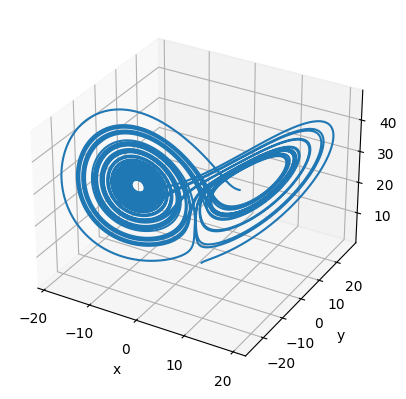

In [31]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()